## Atividade 4

## Classificador de imagens de dia e noite


Utilizando o conjunto de imagens do dataset do projeto [AMOS](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes), construir um classificador de imagens que dado uma determinada imagem deverá ser capaz em classificar em _dia_ ou _noite_.

Para este modelo, será levado em consideração como principal característica seu respectivo valor de brilho.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [3]:
# from google.colab import drive

# drive.mount('/content/drive')
# image_folder = '/content/drive/MyDrive/Colab Notebooks/computer_vision/images'

In [15]:
image_folder = './'

## 2. Principais atividades do _pipeline_

1. Normalizar
2. Extrair características
3. Construir classificador
4. Testar o modelo

*Adaptado deste [repositório](https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation) de Visão Computacional da Udacity, de Cezanne Camacho.*

In [23]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from typing import List, Tuple
%matplotlib inline

In [24]:
def carregar_arquivos(image_dir) -> List[Tuple]:
  im_list = []
  image_types = ["day", "night"]

  for im_type in image_types:
    for file in glob.glob(os.path.join(image_dir, im_type, "*")):

      im = cv2.imread(file)
          
      if not im is None:
        im_list.append((im, im_type))

  return im_list

In [25]:
lista_imagens_teste = carregar_arquivos("images/test")
lista_imagens_treinamento = carregar_arquivos("images/training")

## 3. Normalização

Constuir uma função que receberá uma imagem e redimensionará para o tamanho 1000 x 600.
Vamos inspecionar algumas imagens.

Esta a seguir possui 700 de altura 1300 de comprimento.

Text(0.5, 1.0, 'night')

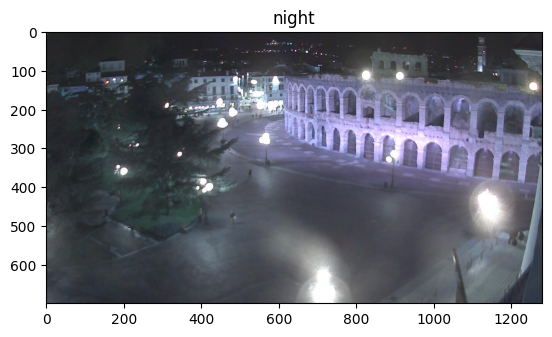

In [18]:
plt.imshow(lista_imagens_treinamento[200][0])
plt.title(lista_imagens_treinamento[200][1])

Já esta nova imagem é menor, possuindo 350 x 650 pixels.

Text(0.5, 1.0, 'day')

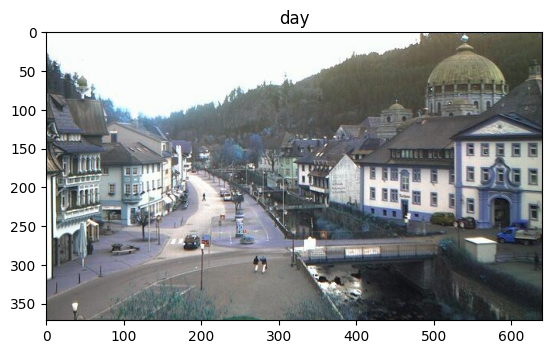

In [19]:
plt.imshow(lista_imagens_treinamento[0][0])
plt.title(lista_imagens_treinamento[0][1])

In [30]:
def padronizar_imagem(imagem) -> cv2.Mat:
    # Obter as dimensões da imagem
    altura = imagem.shape[0]
    largura = imagem.shape[1]

    # Calcular a proporção de redimensionamento
    proporcao = min(1000/largura, 600/altura)

    # Calcular o novo tamanho da imagem
    nova_largura = int(largura * proporcao)
    nova_altura = int(altura * proporcao)

    # Redimensionar a imagem
    img_redimensionada = cv2.resize(imagem, (nova_largura, nova_altura))

    # Retornar a imagem redimensionada
    return img_redimensionada

## 4. Extração de características

Para cada imagem analisada, extrair o componente de brilho médio associado.

In [124]:
def extrair_brilho_medio(imagem) -> int:
    # Converter a imagem para o espaço de cores HSV
    img_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

    # Extrair o canal V (Value)
    canal_v = img_hsv[:, :, 2]

    # Calcular a média dos valores de brilho (canal V)
    brilho_medio = int(cv2.mean(canal_v)[0])

    # Retornar o valor médio de brilho
    return brilho_medio

Agora vamos construir uma lista com todas as imagens e seus brilhos médios extraídos. Vamos também rotular as imagens utilizando hot-enconding, sendo 1 para dia e 0 para noite.

In [125]:
def extrair_caracteristica_imagem(lista_imagem):
    lista_imagem_padrao = []
    
    for imagem, im_type in lista_imagem:
        tipo = 1 if im_type == "day" else 0
        brilho = extrair_brilho_medio(imagem)

        lista_imagem_padrao.append([brilho, tipo])
    
    return lista_imagem_padrao

Testando a rotulação de imagem e padronização.

Text(0.5, 1.0, 'day')

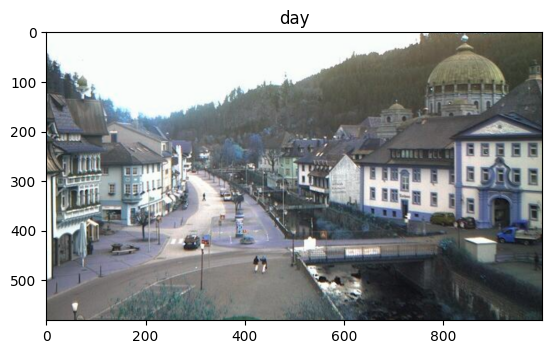

In [126]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]))
plt.title(lista_imagens_treinamento[0][1])

Text(0.5, 1.0, 'night')

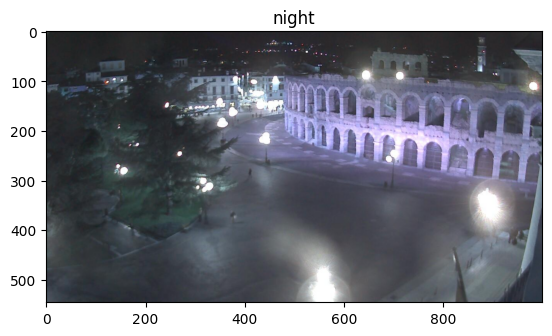

In [127]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[200][0]))
plt.title(lista_imagens_treinamento[200][1])

Obtendo as características de ambos os grupos de imagens, treinamento e testes.

In [128]:
lista_padronizada_treinamento = extrair_caracteristica_imagem(lista_imagens_treinamento)
lista_padronizada_teste = extrair_caracteristica_imagem(lista_imagens_teste)

## 5. Construção do classificador

Desenvolver um modelo de aprendizado de máquina que seja capaz de classificar adequadamente, com no mínimo 90% de acurácia, as imagens que representam o dia e a noite.

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

classificador_decision_tree = DecisionTreeClassifier(random_state=0)

A função a seguir é para padronizar a forma que o ``ScikitLearn`` obtém os dados, separando o que é classe (Y) do que é feature (X).

In [119]:
def definicao_feature_class(lista_padronizada):
    X = []
    Y = []

    for item in lista_padronizada:
        X.append(item[0])
        Y.append(item[1])

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    return X, Y

In [137]:
X, Y = definicao_feature_class(lista_padronizada_treinamento)

In [131]:
classificador_decision_tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

Testando algumas classificações.

Text(0.5, 1.0, 'day')

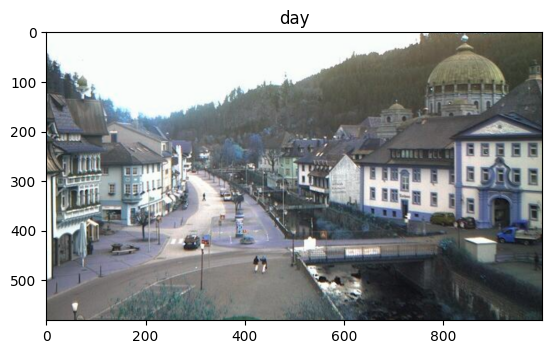

In [132]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]))
plt.title(lista_imagens_treinamento[0][1])

In [146]:
classificador_decision_tree.predict([[lista_padronizada_treinamento[0][0]]])[0]

1

Text(0.5, 1.0, 'night')

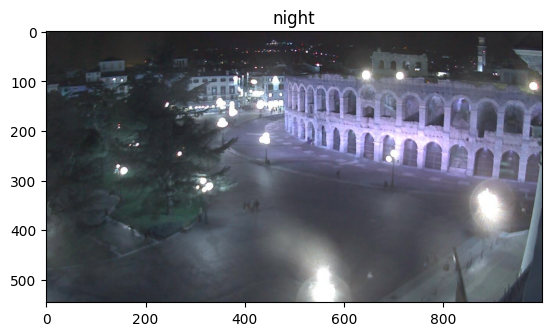

In [147]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[150][0]))
plt.title(lista_imagens_treinamento[150][1])

In [149]:
classificador_decision_tree.predict([[lista_padronizada_treinamento[150][0]]])[0]

0

## 6. Teste do modelo

Dado o conjunto de testes, verificar a acurácia do modelo.

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_test, Y_test = definicao_feature_class(lista_padronizada_teste)
Y_pred = classificador_decision_tree.predict(X_test)

## 6.1 Precisão

Calcular a precisão do modelo com base os dados de teste.

In [153]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.925

## 6.2 Matriz de confusão

Calcular a matriz de confusão do modelo, levando em consideração os dados de teste.

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

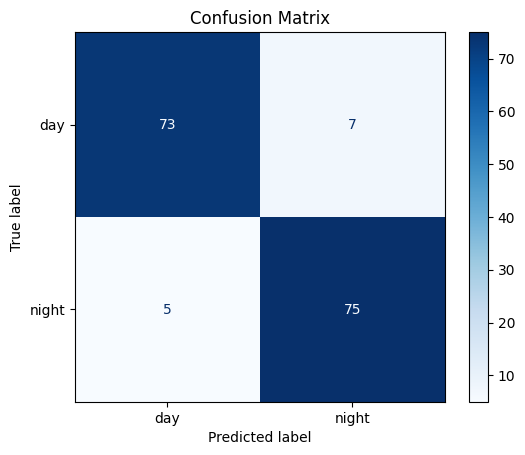

In [161]:
plot_confusion_matrix(Y_test, Y_pred, ['day', 'night'])